Notebook for visualizing the inference results, comparing predictions against actual labels.  
**Note**: You need to generate a `tmp_viz_obj.pkl` file in order to run this notebook. This file gets generated when executing the `evaluate.py` script with the `--viz=True` flag.

In [1]:
import pickle
from pathlib import Path
from html_transpiler.html_transpiler import HTMLTranspiler
from IPython.display import display, HTML, Image

In [2]:
PATH_VIS_OBJ = Path("tmp_viz_obj.pkl")

In [3]:
with open(PATH_VIS_OBJ, 'rb') as handle:
    viz_obj = pickle.load(handle)

In [4]:
predictions = viz_obj["predictions"]
targets = viz_obj["targets"]
targets_filepaths = viz_obj["targets_filepaths"]

In [5]:
assert predictions and targets and targets_filepaths

In [6]:
def display_html_string(html_string):
    page = HTML(html_string)
    display(page)

In [7]:
def compare_results(predicted_labels, actual_labels, actual_img_path):
    transpiler = HTMLTranspiler()

    print(f'Predicted HTML. #tokens: {len(predicted_labels)}')
    predicted_html_string = transpiler.transpile(predicted_labels, insert_random_text=True)
    display_html_string(predicted_html_string)
    
    print(f'Actual HTML. #tokens: {len(actual_labels)}')
    transpiler1 = HTMLTranspiler()
    actual_html_string = transpiler1.transpile(actual_labels, insert_random_text=True)
    display_html_string(actual_html_string)
    
    print(f'Actual image file')
    display(Image(str(actual_img_path))) 

In [8]:
predictions[40]

['header',
 '{',
 'btn-inactive',
 'btn-active',
 '}',
 'row',
 '{',
 'single',
 '{',
 'small-title',
 'text',
 'btn-orange',
 '}',
 '}',
 'row',
 '{',
 'double',
 '{',
 'small-title',
 'text',
 'btn-orange',
 '}',
 'double',
 '{',
 'small-title',
 'text',
 'btn-green',
 '}',
 '}',
 'row',
 '{',
 'quadruple',
 '{',
 'small-title',
 'text',
 'btn-green',
 '}',
 'quadruple',
 '{',
 'small-title',
 'text',
 'btn-orange',
 '}',
 'quadruple',
 '{',
 'small-title',
 'text',
 'btn-green',
 '}',
 'quadruple',
 '{',
 'small-title',
 'text',
 'btn-green',
 '}',
 '}']

Predicted HTML. #tokens: 42


Actual HTML. #tokens: 38


Actual image file


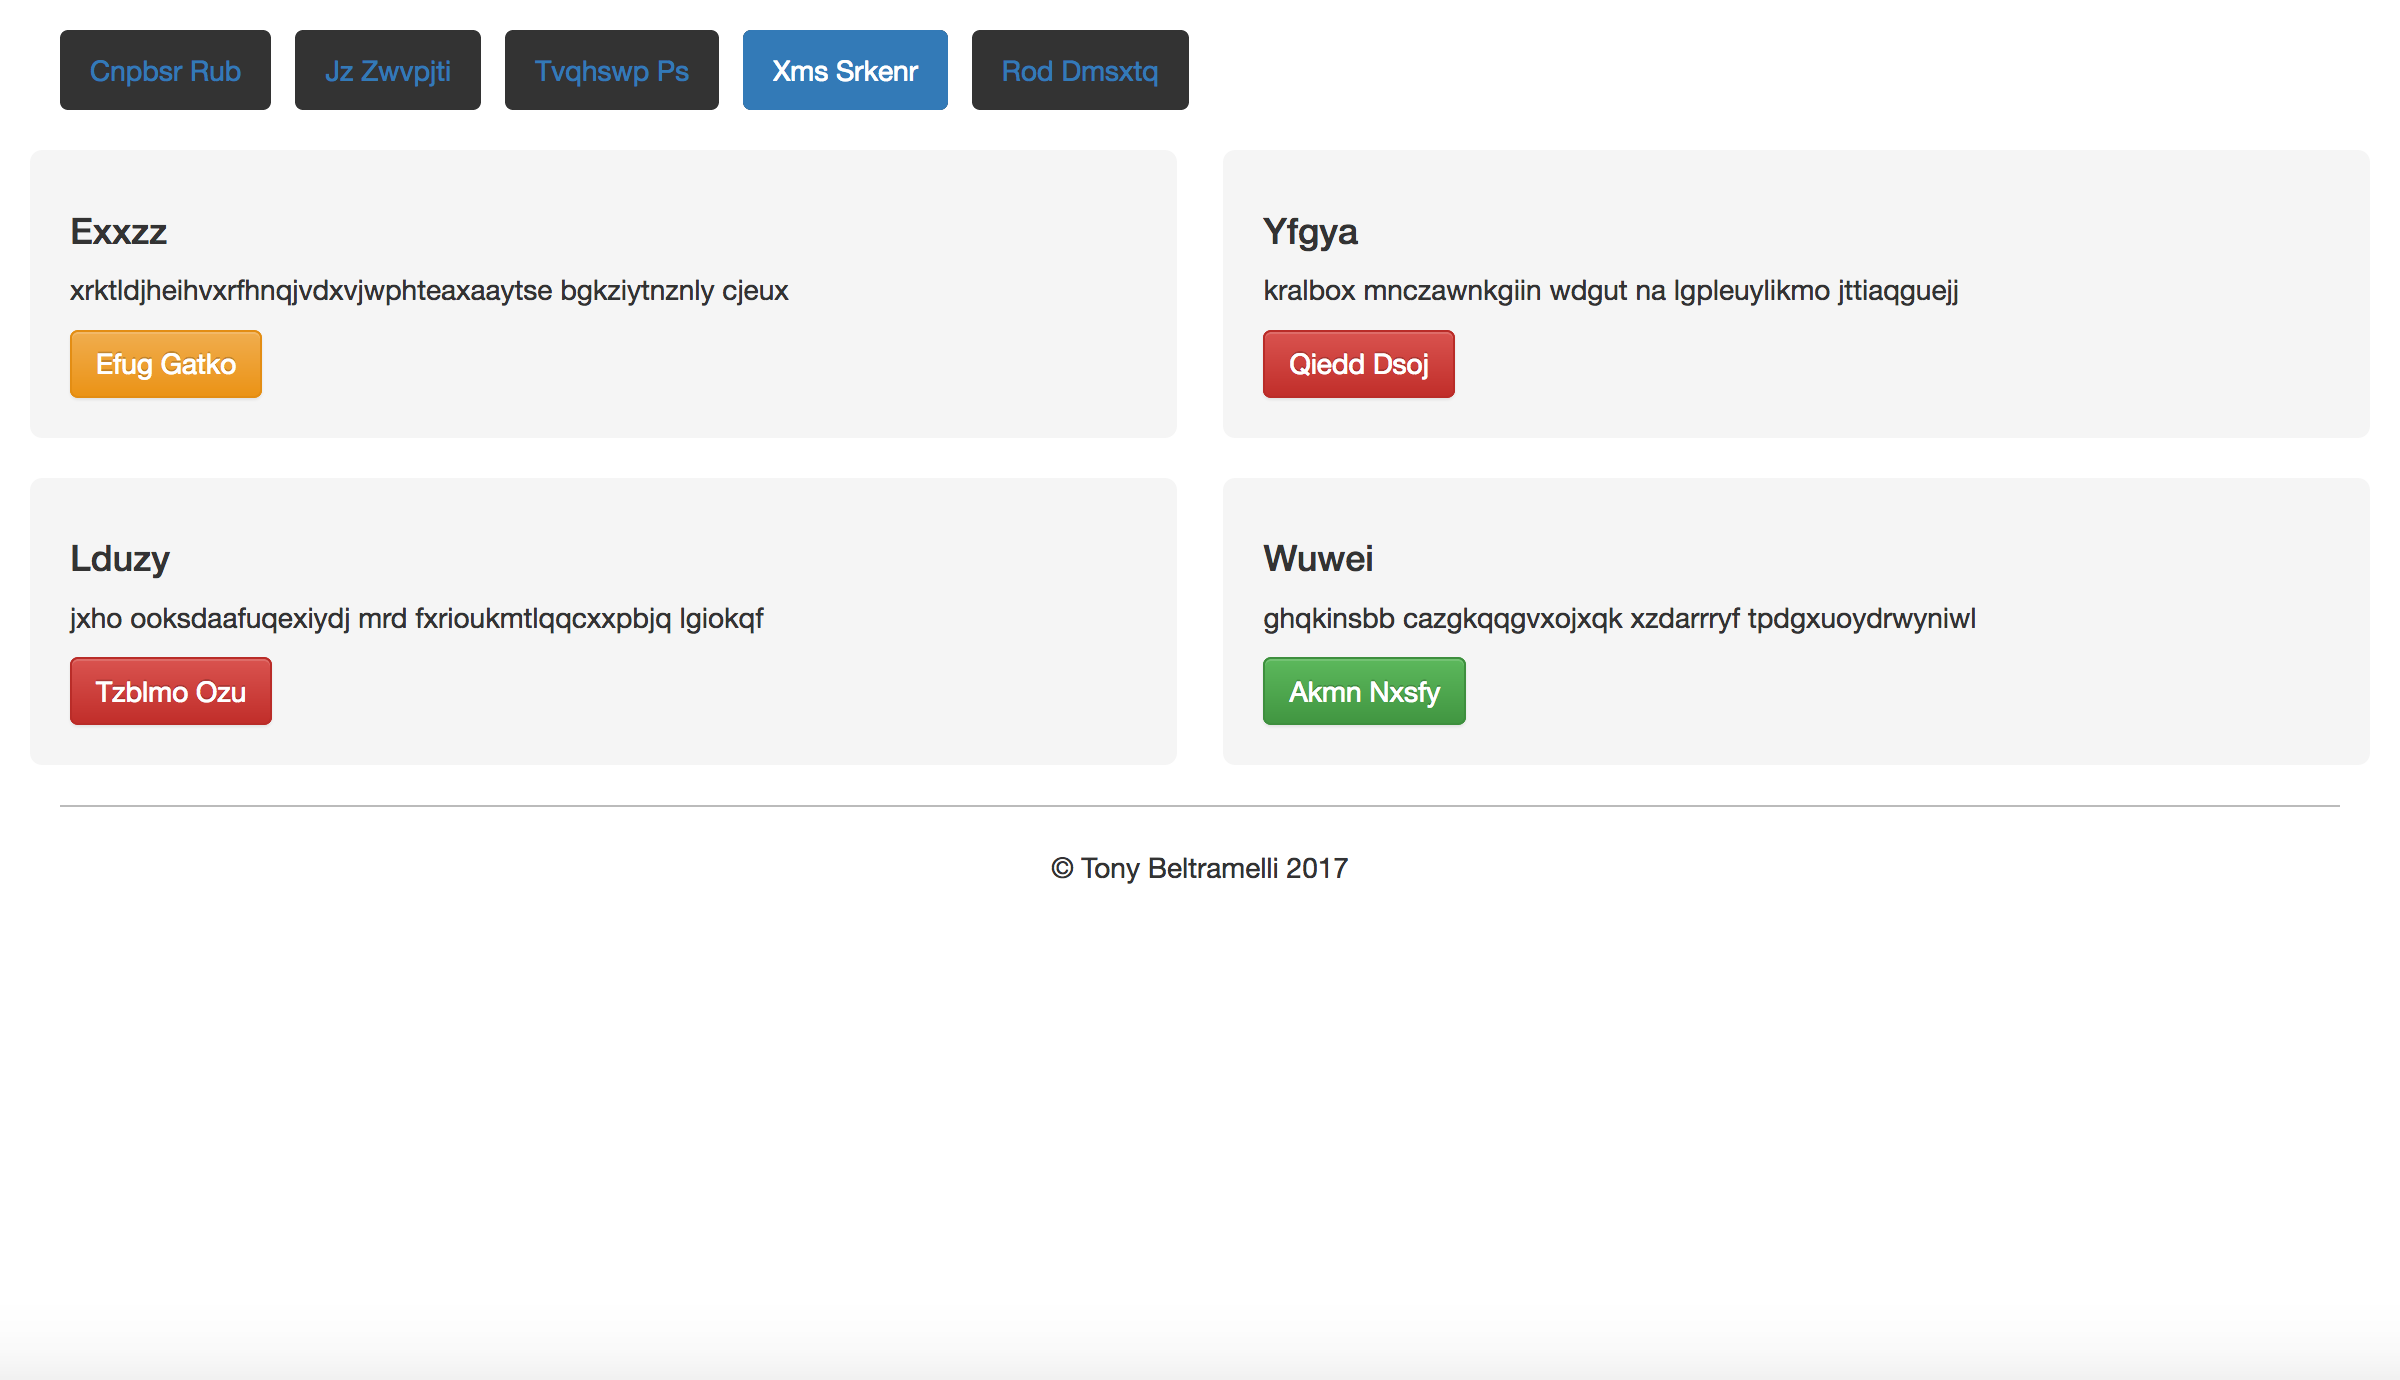

In [9]:
# Change the following variable to test out different results
example_idx = 41
compare_results(predictions[example_idx], targets[example_idx], targets_filepaths[example_idx])